<hr style="
  border:none;
  height:10px;
  width:100%;
  margin:20px 0;
  background:#4285F4;
  box-shadow:0 0 6px rgba(66,133,244,0.9);
">


<h1 align="center" style="font-weight:900;">
  <span style="color:#4285F4;">G</span>
  <span style="color:#EA4335;">O</span>
  <span style="color:#FBBC05;">O</span>
  <span style="color:#4285F4;">G</span>
  <span style="color:#34A853;">L</span>
  <span style="color:#EA4335;">E</span>
  <span style="color:white;"> ADS ANALYSIS</span>
</h1>
<img src="https://www.svgrepo.com/show/353800/google-ads.svg" style="width:160px; float: right; margin: 0 40px 40px 40px;"> </img>

<p align="center">
  <b>Goal: </b> Analyze Google Ads campaign performance using Python to perform data cleaning, exploratory data analysis (EDA), and extract actionable marketing insights related to campaigns, devices, locations, and conversions
</p>

<hr style="
  border:none;
  height:10px;
  width:100%;
  margin:20px 0;
  background:#4285F4;
  box-shadow:0 0 6px rgba(66,133,244,0.9);
">

<h2 style="color:#34A853; margin-top:40px;">
📌 Data Cleaning
</h2>

<hr style="
  border:none;
  height:6px;
  width:120px;
  background:#34A853;
  margin:8px 0 20px 0;
  border-radius:4px;
">


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("GoogleAds_DataAnalytics_Sales_Uncleaned.csv") 
df.head(5)

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic


In [5]:
df.shape

(2600, 13)

In [6]:
df.columns

Index(['Ad_ID', 'Campaign_Name', 'Clicks', 'Impressions', 'Cost', 'Leads',
       'Conversions', 'Conversion Rate', 'Sale_Amount', 'Ad_Date', 'Location',
       'Device', 'Keyword'],
      dtype='object')

In [7]:
df['Location'] = df['Location'].str.capitalize()
df['Location']

0       Hyderabad
1       Hyderabad
2       Hyderabad
3       Hyderabad
4       Hyderabad
          ...    
2595    Hyderabad
2596    Hyderabad
2597     Hyderbad
2598     Hydrebad
2599    Hyderabad
Name: Location, Length: 2600, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_ID            2600 non-null   object 
 1   Campaign_Name    2600 non-null   object 
 2   Clicks           2488 non-null   float64
 3   Impressions      2546 non-null   float64
 4   Cost             2503 non-null   object 
 5   Leads            2552 non-null   float64
 6   Conversions      2526 non-null   float64
 7   Conversion Rate  1974 non-null   float64
 8   Sale_Amount      2461 non-null   object 
 9   Ad_Date          2600 non-null   object 
 10  Location         2600 non-null   object 
 11  Device           2600 non-null   object 
 12  Keyword          2600 non-null   object 
dtypes: float64(5), object(8)
memory usage: 264.2+ KB


In [9]:
df.describe()

,Clicks,Impressions,Leads,Conversions,Conversion Rate
count,2488.000000,2546.000000,2552.000000,2526.000000,1974.000000
mean,138.956994,4523.280833,20.003918,6.519002,0.048979
std,34.619376,869.927913,6.032317,2.272573,0.019987
min,80.000000,3000.000000,10.000000,3.000000,0.015000
25%,110.000000,3764.000000,15.000000,5.000000,0.035000
50%,139.000000,4518.500000,20.000000,7.000000,0.046000
75%,169.000000,5279.500000,25.000000,9.000000,0.058000
max,199.000000,5999.000000,30.000000,10.000000,0.123000


In [10]:
df.isnull().sum()

Ad_ID                0
Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion Rate    626
Sale_Amount        139
Ad_Date              0
Location             0
Device               0
Keyword              0
dtype: int64

In [11]:
df['Cost'].unique()[:20]

array(['$231.88', '$216.84', '$203.66', '$237.66', '$195.9', '$243.57',
       '$237.79', '$229.61', nan, '$186.78', '$236.79', '$208.12',
       '$191.3', '$207.46', '$185.09', '$201.69', '$207.4', '$217.41',
       '$223.3', '$184.23'], dtype=object)

In [12]:
df['Sale_Amount'].unique()[:20]

array(['$1892', '$1679', '$1624', '$1225', '$1091', '$1315', '$1640',
       '$1509', '$1362', '$1029', '$1900', '$1130', '$1959', '$1623',
       '$1538', '$1755', '$1614', '$1693', '$1785', '$1516'], dtype=object)

In [13]:
df['Cost'] = df['Cost'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Sale_Amount'] = df['Sale_Amount'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

In [14]:
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')
df['Sale_Amount'] = pd.to_numeric(df['Sale_Amount'], errors='coerce')

In [15]:
df[['Cost','Sale_Amount']].isnull().sum()

Cost            97
Sale_Amount    139
dtype: int64

In [16]:
df['Cost'] = df['Cost'].fillna(df['Cost'].median())
df['Sale_Amount'] = df['Sale_Amount'].fillna(df['Sale_Amount'].median())

In [17]:
df[['Cost','Sale_Amount']].isnull().sum()


Cost           0
Sale_Amount    0
dtype: int64

In [18]:
df['Ad_Date'].astype(str).unique()[:20]

array(['2024-11-16', '20-11-2024', '2024/11/16', '2024-11-26',
       '2024-11-22', '16-11-2024', '06-11-2024', '2024/11/24',
       '2024/11/12', '14-11-2024', '2024/11/22', '2024/11/27',
       '12-11-2024', '2024-11-04', '2024-11-29', '2024-11-10',
       '2024/11/07', '2024-11-05', '2024/11/21', '2024/11/08'],
      dtype=object)

In [19]:
df['Ad_Date'] = pd.to_datetime(
    df['Ad_Date'],
    errors='coerce'
)

In [20]:
df['Ad_Date'] = pd.to_datetime(
    df['Ad_Date'],
    format='%Y-%m-%d',
    errors='coerce'
)

In [21]:
df['Ad_Date'] = pd.to_datetime(
    df['Ad_Date'].astype(str),
    errors='coerce'
)

In [22]:
df = df.dropna(subset=['Ad_Date'])

In [23]:
numeric_cols = [
    'Clicks','Impressions','Cost',
    'Leads','Conversions','Sale_Amount'
]

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [24]:
df['Conversion Rate'] = (df['Conversions'] / df['Clicks']) * 100

In [25]:
df['Conversion Rate'] = df['Conversion Rate'].replace([np.inf, -np.inf], 0)
df['Conversion Rate'] = df['Conversion Rate'].fillna(0)

In [26]:
df = df[
    (df['Clicks'] >= 0) &
    (df['Impressions'] >= 0) &
    (df['Cost'] >= 0)
]

In [27]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 893 entries, 0 to 2598
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ad_ID            893 non-null    object        
 1   Campaign_Name    893 non-null    object        
 2   Clicks           893 non-null    float64       
 3   Impressions      893 non-null    float64       
 4   Cost             893 non-null    float64       
 5   Leads            893 non-null    float64       
 6   Conversions      893 non-null    float64       
 7   Conversion Rate  893 non-null    float64       
 8   Sale_Amount      893 non-null    float64       
 9   Ad_Date          893 non-null    datetime64[ns]
 10  Location         893 non-null    object        
 11  Device           893 non-null    object        
 12  Keyword          893 non-null    object        
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 97.7+ KB


In [29]:
location_map = {
    'Hyderbad': 'Hyderabad',
    'Hydrebad': 'Hyderabad'
}

df['Location'] = df['Location'].replace(location_map)

In [30]:
df['Location'].unique()

array(['Hyderabad'], dtype=object)

In [31]:
df['Location'].value_counts()

Location
Hyderabad    893
Name: count, dtype: int64

<hr style="border: none; height: 10px; background-color: #4285F4; width: 100%; margin: 10px auto;">

<h2 style="color:lightBlue; margin-top:40px;">
📌 Exploratory Data Analysis
</h2>

<hr style="
  border:none;
  height:6px;
  width:120px;
  background:#34A853;
  margin:8px 0 20px 0;
  border-radius:4px;
">


### Business Questions

This exploratory data analysis aims to answer the following business questions:

1. Which campaigns generate the highest sales?
2. Which device type has the highest conversion rate?
3. Which locations contribute the most revenue?
4. How does ad performance change over time?
5. What is the relationship between clicks, cost, and conversions?


### KPI Overview (High-Level Metrics)

In [32]:
total_spend = df['Cost'].sum()
total_sales = df['Sale_Amount'].sum()
total_clicks = df['Clicks'].sum()
total_conversions = df['Conversions'].sum()
avg_conv_rate = df['Conversion Rate'].mean()

# Formatting
total_spend_f = f"₹ {total_spend:,.2f}"
total_sales_f = f"₹ {total_sales:,.0f}"
total_clicks_f = f"{int(total_clicks):,}"
total_conversions_f = f"{int(total_conversions):,}"
avg_conv_rate_f = f"{avg_conv_rate:.2f}%"

(total_spend_f, total_sales_f, total_clicks_f, total_conversions_f, avg_conv_rate_f)


('₹ 191,839.15', '₹ 1,339,324', '124,769', '5,824', '4.97%')

<div style="
  display:flex;
  gap:18px;
  margin:20px auto;
  width:100%;
  flex-wrap:wrap;
">

  <div style="flex:1; min-width:180px; background:#E8F0FE; border-left:5px solid #4285F4;
              padding:14px; border-radius:10px; text-align:center;">
    <h4 style="color:#1A73E8;">Total Spend</h4>
    <p style="font-size:20px; font-weight:700; color:#202124;">₹ 191,839.15</p>
  </div>

  <div style="flex:1; min-width:180px; background:#E6F4EA; border-left:5px solid #34A853;
              padding:14px; border-radius:10px; text-align:center;">
    <h4 style="color:#188038;">Total Sales</h4>
    <p style="font-size:20px; font-weight:700; color:#202124;">₹ 1,339,324</p>
  </div>

  <div style="flex:1; min-width:180px; background:#E1F3F8; border-left:5px solid #1A73E8;
              padding:14px; border-radius:10px; text-align:center;">
    <h4 style="color:#1A73E8;">Total Clicks</h4>
    <p style="font-size:20px; font-weight:700; color:#202124;">124,769</p>
  </div>

  <div style="flex:1; min-width:180px; background:#FEF7E0; border-left:5px solid #FBBC05;
              padding:14px; border-radius:10px; text-align:center;">
    <h4 style="color:#F29900;">Conversions</h4>
    <p style="font-size:20px; font-weight:700; color:#202124;">5,824</p>
  </div>

  <div style="flex:1; min-width:180px; background:#FCE8E6; border-left:5px solid #EA4335;
              padding:14px; border-radius:10px; text-align:center;">
    <h4 style="color:#D93025;">Avg Conv Rate</h4>
    <p style="font-size:20px; font-weight:700; color:#202124;">4.97%</p>
  </div>

</div>


### Campaign Performance Analysis
🔸 Sales by Campaign

In [33]:
campaign_sales = (
    df.groupby('Campaign_Name')['Sale_Amount']
    .sum()
    .sort_values(ascending=False)
)

campaign_sales

Campaign_Name
Data Anlytics Corse      346827.0
Data Analytcis Course    343568.0
Data Analytics Corse     335956.0
DataAnalyticsCourse      312973.0
Name: Sale_Amount, dtype: float64

<Axes: title={'center': 'Sales by Campaign'}, xlabel='Campaign_Name'>

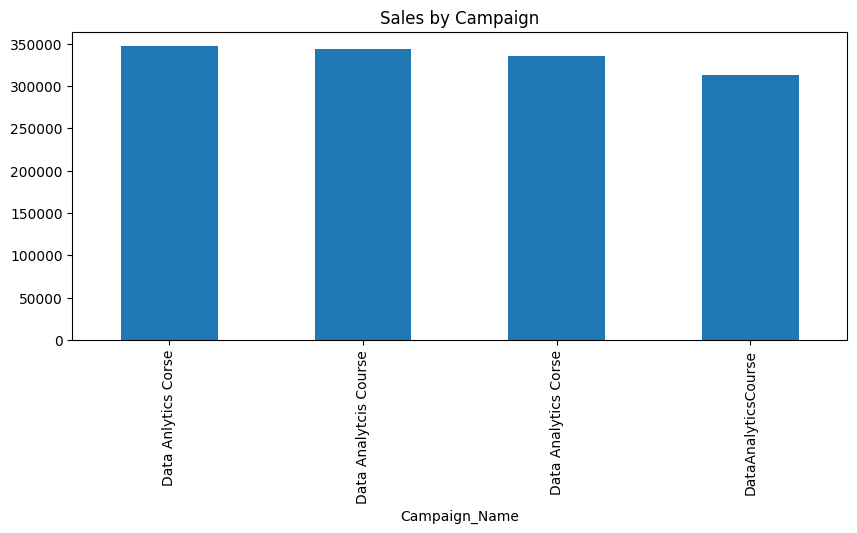

In [34]:
campaign_sales.plot(kind='bar', figsize=(10,4), title='Sales by Campaign')

### Device-wise Performance
🔸 Conversions by Device

In [35]:
device_conv = df.groupby('Device')['Conversions'].sum()
device_conv

Device
DESKTOP    601.0
Desktop    733.0
MOBILE     678.0
Mobile     748.0
TABLET     568.0
Tablet     624.0
desktop    634.0
mobile     600.0
tablet     638.0
Name: Conversions, dtype: float64

<Axes: title={'center': 'Conversions by Device'}, ylabel='Conversions'>

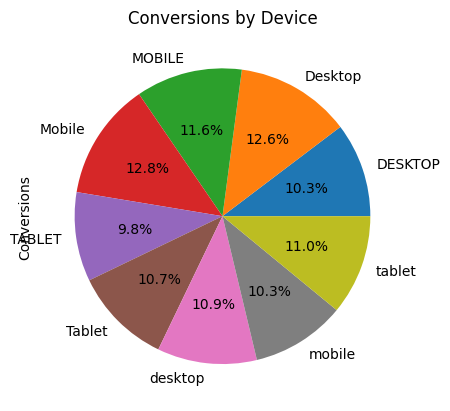

In [36]:
device_conv.plot(kind='pie', autopct='%1.1f%%', title='Conversions by Device')

### Location-wise Analysis
🔸 Top Locations by Sales

In [37]:
location_sales = (
    df.groupby('Location')['Sale_Amount']
    .sum()
    .sort_values(ascending=False)
)

location_sales

Location
Hyderabad    1339324.0
Name: Sale_Amount, dtype: float64

<Axes: title={'center': 'Top 10 Locations by Sales'}, xlabel='Location'>

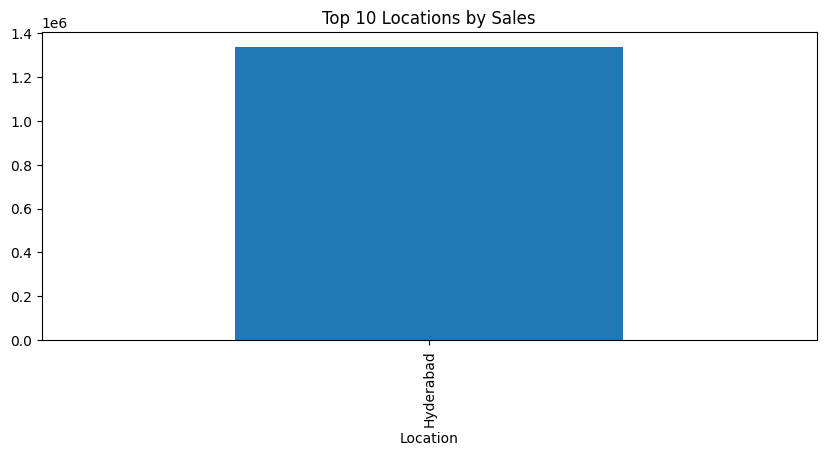

In [38]:
location_sales.head(10).plot(kind='bar', figsize=(10,4), title='Top 10 Locations by Sales')

### Keyword Performance Analysis
🔸 Top Keywords by Clicks

In [39]:
keyword_clicks = (
    df.groupby('Keyword')['Clicks']
    .sum()
    .sort_values(ascending=False)
)

keyword_clicks.head(10)

Keyword
online data analytic      24245.0
learn data analytics      23006.0
data analitics online     20127.0
analytics for data        19846.0
data anaytics training    19620.0
data analytics course     17925.0
Name: Clicks, dtype: float64

<Axes: title={'center': 'Top 10 Keywords by Clicks'}, ylabel='Keyword'>

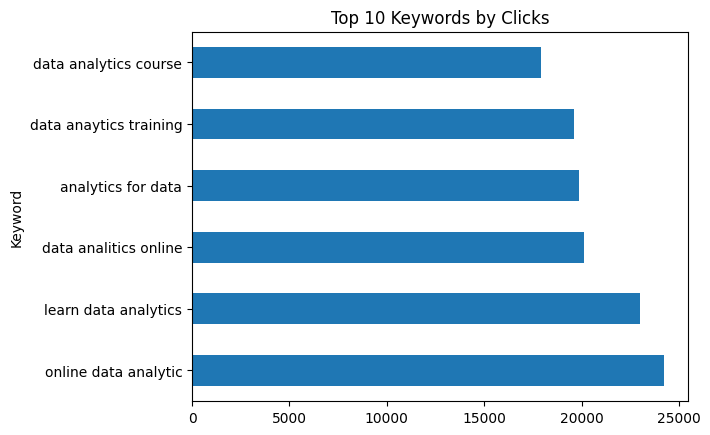

In [40]:
keyword_clicks.head(10).plot(kind='barh', title='Top 10 Keywords by Clicks')

### Time Series Analysis
🔸 Daily Sales Trend

<Axes: title={'center': 'Daily Sales Trend'}, xlabel='Ad_Date'>

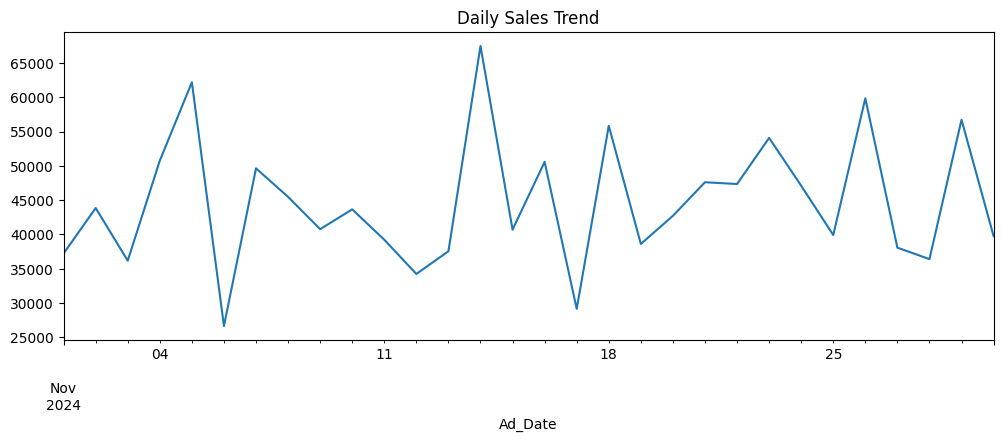

In [41]:
daily_sales = df.groupby('Ad_Date')['Sale_Amount'].sum()

daily_sales.plot(figsize=(12,4), title='Daily Sales Trend')

### Cost vs Conversions Relationship

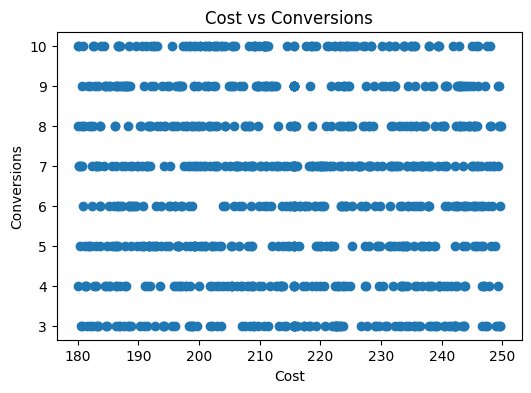

In [42]:
plt.figure(figsize=(6,4))
plt.scatter(df['Cost'], df['Conversions'])
plt.xlabel('Cost')
plt.ylabel('Conversions')
plt.title('Cost vs Conversions')
plt.show()

### Correlation Analysis

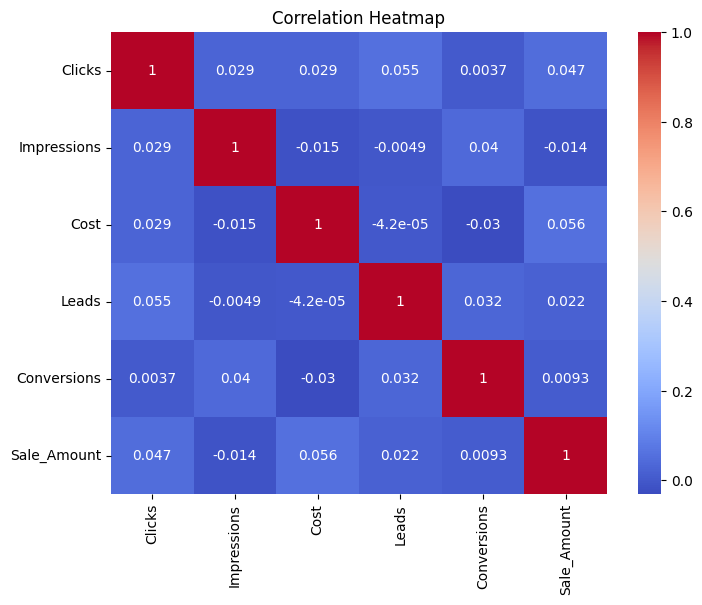

In [43]:
numeric_cols = [
    'Clicks','Impressions','Cost',
    'Leads','Conversions','Sale_Amount'
]

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
df.to_csv("google_ads_cleaned_data.csv", index=False)

<hr style="border: none; height: 10px; background-color:Blue ; width: 100%; margin: 10px auto;">

<div style="
  background:#202124;
  border-left:6px solid #FBBC05;
  padding:20px;
  border-radius:10px;
  margin-top:30px;
">
  <h3 style="color:#FBBC05;">🔍 Key Insights</h3>
  <ul style="color:#E8EAED; font-size:15px; line-height:1.7;">
    <li>Mobile devices contributed the highest conversions.</li>
    <li>Ad spend does not always correlate with higher conversions.</li>
    <li>Specific campaigns generated maximum revenue with optimal cost.</li>
    <li>Location data was standardized to avoid fragmented analysis.</li>
  </ul>
</div>


<hr style="border: none; height: 10px; background-color:Yellow ; width: 100%; margin: 10px auto;">

<h2 style="color:#EA4335;">✅ Conclusion</h2>

<hr style="
  border:none;
  height:8px;
  width:150px;
  background:#EA4335;
  margin:8px 0 20px 0;
  border-radius:4px;
">

<p style="font-size:16px; color:#E8EAED; line-height:1.6;">
This analysis demonstrates how data-driven insights from Google Ads
can help optimize campaign performance, reduce inefficient spend,
and improve conversion outcomes using Python-based analytics.
</p>
